# Flights analysis

Data description  

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
%matplotlib inline


In [87]:
#download link of drive as i uploaded data in drive 

df =  pd.read_csv("https://drive.google.com/uc?id=15VsJdNIdvkp5U5629dI26ow2CQ_Lw-4X&export=download")
df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,Unnamed: 21
0,2017,1,AA,American Airlines Inc.,ABQ,"Albuquerque, NM: Albuquerque International Sun...",125.0,31.0,16.26,1.00,...,10.36,1.0,0.0,1378.0,758.0,21.0,95.0,0.0,504.0,NaN
1,2017,1,AA,American Airlines Inc.,ALB,"Albany, NY: Albany International",88.0,10.0,4.52,0.00,...,4.41,1.0,0.0,402.0,171.0,0.0,17.0,0.0,214.0,NaN
2,2017,1,AA,American Airlines Inc.,AMA,"Amarillo, TX: Rick Husband Amarillo International",24.0,6.0,1.65,0.30,...,2.79,1.0,0.0,419.0,59.0,64.0,166.0,0.0,130.0,NaN
3,2017,1,AA,American Airlines Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",1112.0,204.0,72.58,2.34,...,65.02,24.0,6.0,11968.0,4237.0,108.0,2693.0,159.0,4771.0,NaN
4,2017,1,AA,American Airlines Inc.,AUS,"Austin, TX: Austin - Bergstrom International",729.0,126.0,47.75,2.86,...,38.06,2.0,0.0,6816.0,3096.0,103.0,1419.0,110.0,2088.0,NaN


###  Dataset : 
* RangeIndex: 63552 entries, 0 to 63551. 
* Data columns (total 22 columns) also more info provided below in Airport statistics.
* All features seems to be importatnt , but i think most important one is arr_flights as it count total number of flights .
* Also we may need to investigate more with weather . 

Airport statistics:

* arr_flights: Number of flights which arrived at the airport.
* arr_del15: Number of flights delayed (>= 15minutes late).
* carrier_ct: Number of flights delayed due to air carrier (e.g. maintenance or crew problems, aircraft cleaning, baggage loading, fueling, etc.).
* weather_ct: Number of flights delayed due to weather.
* nas_ct: Number of flights delayed due to National Aviation System (e.g. non-extreme weather conditions, airport operations, heavy traffic volume, and air traffic control).
* security_ct: Number of flights delayed due to security (e.g. evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas).
* late_aircraft_ct: Number of flights delayed due to a previous flight using the same aircraft being late.
* arr_cancelled: Number of cancelled flights.
* arr_diverted: Number of diverted flights.
* arr_delay: Total time (minutes) of delayed flights.
* carrier_delay: Total time (minutes) of delayed flights due to air carrier.
* weather_delay: Total time (minutes) of delayed flights due to weather.
* nas_delay: Total time (minutes) of delayed flights due to National Aviation System.
* security_delay: Total time (minutes) of delayed flights due to security.
* late_aircraft_delay: Total time (minutes) of delayed flights due to a previous flight using the same aircraft being late.


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63552 entries, 0 to 63551
Data columns (total 22 columns):
year                   63552 non-null int64
 month                 63552 non-null int64
carrier                63552 non-null object
carrier_name           63552 non-null object
airport                63552 non-null object
airport_name           63552 non-null object
arr_flights            63468 non-null float64
arr_del15              63290 non-null float64
carrier_ct             63468 non-null float64
 weather_ct            63468 non-null float64
nas_ct                 63468 non-null float64
security_ct            63468 non-null float64
late_aircraft_ct       63468 non-null float64
arr_cancelled          63468 non-null float64
arr_diverted           63468 non-null float64
 arr_delay             63468 non-null float64
 carrier_delay         63468 non-null float64
weather_delay          63468 non-null float64
nas_delay              63468 non-null float64
security_delay         63

# Cleaning the data

rename columns that have problems with their name 

In [89]:
#make inplace = true to save changes 
df.rename(columns={' month':'month'},inplace = True)


In [90]:
#check duplicated
df.duplicated().sum()

0

There is no duplicated

In [91]:
# drop Unnamed column
df = df.drop('Unnamed: 21',axis=1)

Remove Unnamed column which is an  empty column

In [92]:
df = df.dropna()
df.shape

(63290, 21)

I think that we should remove null data here in our example as we have small values of it .

In [93]:
df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2017,1,AA,American Airlines Inc.,ABQ,"Albuquerque, NM: Albuquerque International Sun...",125.0,31.0,16.26,1.00,...,0.00,10.36,1.0,0.0,1378.0,758.0,21.0,95.0,0.0,504.0
1,2017,1,AA,American Airlines Inc.,ALB,"Albany, NY: Albany International",88.0,10.0,4.52,0.00,...,0.00,4.41,1.0,0.0,402.0,171.0,0.0,17.0,0.0,214.0
2,2017,1,AA,American Airlines Inc.,AMA,"Amarillo, TX: Rick Husband Amarillo International",24.0,6.0,1.65,0.30,...,0.00,2.79,1.0,0.0,419.0,59.0,64.0,166.0,0.0,130.0
3,2017,1,AA,American Airlines Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",1112.0,204.0,72.58,2.34,...,1.98,65.02,24.0,6.0,11968.0,4237.0,108.0,2693.0,159.0,4771.0
4,2017,1,AA,American Airlines Inc.,AUS,"Austin, TX: Austin - Bergstrom International",729.0,126.0,47.75,2.86,...,0.99,38.06,2.0,0.0,6816.0,3096.0,103.0,1419.0,110.0,2088.0


### Geting city name from Airport Name

we will add new variable called city 

In [94]:
# vaiable a depend on wrangling 
a = df['airport_name'].str.split(',').str[-1]
df['city'] = a.str.split(':').str[0]
df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,city
0,2017,1,AA,American Airlines Inc.,ABQ,"Albuquerque, NM: Albuquerque International Sun...",125.0,31.0,16.26,1.00,...,10.36,1.0,0.0,1378.0,758.0,21.0,95.0,0.0,504.0,NM
1,2017,1,AA,American Airlines Inc.,ALB,"Albany, NY: Albany International",88.0,10.0,4.52,0.00,...,4.41,1.0,0.0,402.0,171.0,0.0,17.0,0.0,214.0,NY
2,2017,1,AA,American Airlines Inc.,AMA,"Amarillo, TX: Rick Husband Amarillo International",24.0,6.0,1.65,0.30,...,2.79,1.0,0.0,419.0,59.0,64.0,166.0,0.0,130.0,TX
3,2017,1,AA,American Airlines Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",1112.0,204.0,72.58,2.34,...,65.02,24.0,6.0,11968.0,4237.0,108.0,2693.0,159.0,4771.0,GA
4,2017,1,AA,American Airlines Inc.,AUS,"Austin, TX: Austin - Bergstrom International",729.0,126.0,47.75,2.86,...,38.06,2.0,0.0,6816.0,3096.0,103.0,1419.0,110.0,2088.0,TX


In [95]:
#exploreing 2020 flights
flight_2020 = df[df['year']==2020]
flight_2020.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,city
18035,2020,1,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",50.0,6.0,4.88,0.00,...,0.18,0.0,0.0,391.0,329.0,0.0,51.0,0.0,11.0,PA
18036,2020,1,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",111.0,14.0,7.53,0.25,...,3.85,0.0,1.0,1070.0,662.0,15.0,123.0,0.0,270.0,LA
18037,2020,1,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",174.0,25.0,10.70,2.74,...,7.74,0.0,0.0,1373.0,686.0,147.0,121.0,0.0,419.0,GA
18038,2020,1,9E,Endeavor Air Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",3803.0,408.0,89.07,18.25,...,188.18,9.0,8.0,34017.0,11236.0,2644.0,4607.0,63.0,15467.0,GA
18039,2020,1,9E,Endeavor Air Inc.,ATW,"Appleton, WI: Appleton International",56.0,6.0,1.88,0.00,...,1.00,0.0,0.0,297.0,157.0,0.0,83.0,0.0,57.0,WI


by taking a view to this data set we can see that last month within our data is june,2020 

### Number of airports in the dataset

In [96]:
# taking sample view to airports 
df.airport_name.unique()[0:12]

array(['Albuquerque, NM: Albuquerque International Sunport',
       'Albany, NY: Albany International',
       'Amarillo, TX: Rick Husband Amarillo International',
       'Atlanta, GA: Hartsfield-Jackson Atlanta International',
       'Austin, TX: Austin - Bergstrom International',
       'Hartford, CT: Bradley International',
       'Nashville, TN: Nashville International',
       'Boise, ID: Boise Air Terminal', 'Boston, MA: Logan International',
       'Buffalo, NY: Buffalo Niagara International',
       'Baltimore, MD: Baltimore/Washington International Thurgood Marshall',
       'Charleston, SC: Charleston AFB/International'], dtype=object)

In [97]:
len(df.airport.unique())

371

There are 371  airports in our dataset

## Univariate Exploration

### explore number of flights each carrier make with certin airport per month 

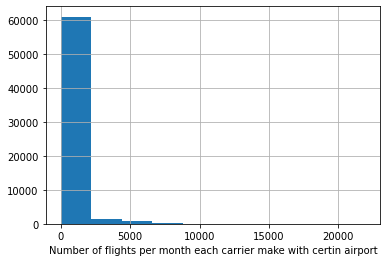

In [98]:
# histogram of number of flights 
df.arr_flights.hist()
plt.xlabel('Number of flights per month each carrier make with certin airport')
plt.show()

In [99]:
df.arr_flights.describe()

count    63290.000000
mean       361.126371
std       1001.393130
min          1.000000
25%         48.000000
50%         94.000000
75%        244.000000
max      21931.000000
Name: arr_flights, dtype: float64

The Number of flights is right skewed  most of the data bellow 244.00. 

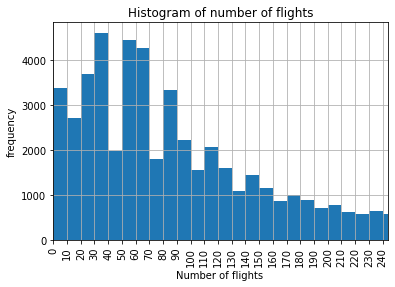

In [100]:
# printing histogram 
df.arr_flights.hist(bins=list(range(0,244+10,10)))
plt.xticks(list(range(0,244+10,10)),rotation=90)

#setting limit for x
plt.xlim(0,244)
plt.title('Histogram of number of flights')
plt.ylabel('frequency')
plt.xlabel('Number of flights ')

plt.show()

> we can see here that most common value of total flights a certin carrier made to a certin airport in a certin month is commonly to be between 20 and 80 .

### Explore Number of flights delayed


late_aircraft_ct: Number of flights delayed due to a previous flight using the same aircraft being late.

In [101]:
df['late_aircraft_ct'].describe()

count    63290.000000
mean        23.072897
std         67.661504
min          0.000000
25%          1.332500
50%          5.210000
75%         15.320000
max       1443.450000
Name: late_aircraft_ct, dtype: float64

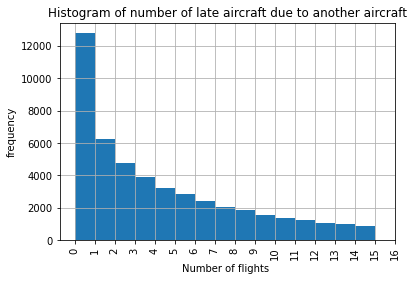

In [102]:
df.late_aircraft_ct.hist(bins=list(range(0,16,1)))
plt.xticks(list(range(0,17,1)),rotation=90)

plt.title('Histogram of number of late aircraft due to another aircraft')
plt.ylabel('frequency')
plt.xlabel('Number of flights ')

plt.show()

> we can see that most common values is small and that not occur alot 

## Bivariate Exploration


## Most desired Month 

In [104]:
df_month = df.groupby('month')['arr_flights'].mean().reset_index()

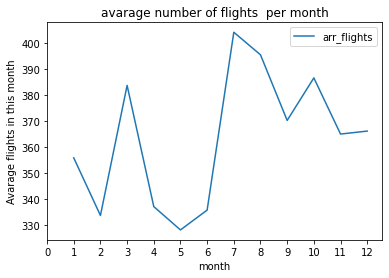

In [105]:
df_month.plot(x='month', y='arr_flights' )
plt.xticks(list(range(0,13,1)))
plt.ylabel("Avarage flights in this month")
plt.title("avarage number of flights  per month")
plt.show()

> we can see that jully has the most number of flights on avarage 

### Weather cancelations Monthly trends

In [106]:
df_weather = df[['month', 'weather_delay']].groupby('month').sum().reset_index()

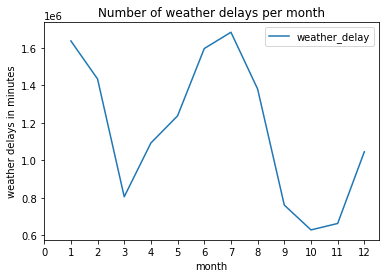

In [107]:
df_weather.plot(x='month', y='weather_delay' )
plt.xticks(list(range(0,13,1)))
plt.ylabel("weather delays in minutes")
plt.title("Number of weather delays per month")
plt.show()

we will explore total records per year in our dataset 

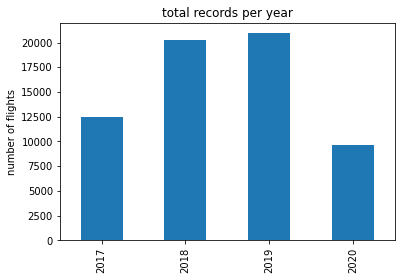

In [108]:
#definig color variable to make plot appear with same color as there is no need here to different colors 
color = sn.color_palette()[0]

# plotting number of flights per year 
df['year'].value_counts().sort_index().plot(kind = 'bar' , color = color ) 
plt.ylabel('number of flights')
plt.title('total records per year');


# correlation between >15minuit delays and carrier

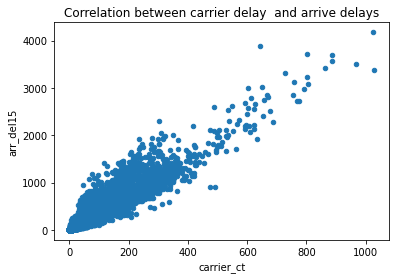

In [109]:
df.plot.scatter(x='carrier_ct',y='arr_del15')
plt.title('Correlation between carrier delay  and arrive delays')
plt.show()



scatter plot shoe positve realtionship between 2 variables

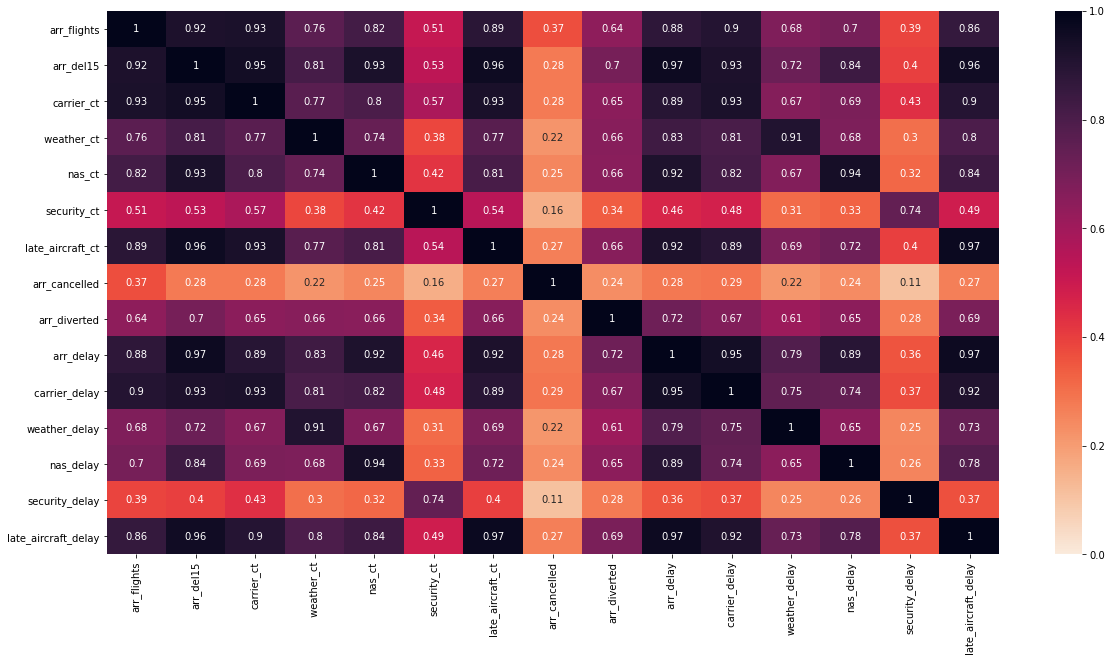

In [110]:
df_corr = df.drop(['month','carrier','airport','airport_name','city','carrier_name','year'],axis=1).corr()
plt.figure(figsize=(20,10))
sn.heatmap(df_corr, annot=True , vmin=0 ,cmap='rocket_r')
plt.show()

> there is high correlation between nas_ct and nas_delay  and also carrier_ct and arr_delay 

## carrier in dealing with delayed time due to security 

/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


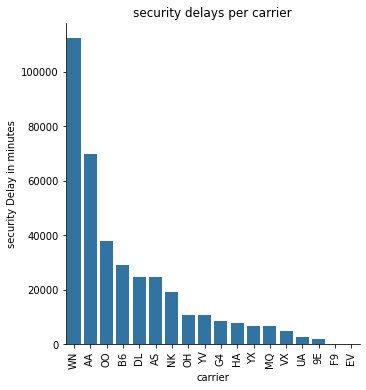

In [111]:
#grouping 
carrier_delays = df[['carrier','security_delay']].groupby('carrier').sum().reset_index().sort_values('security_delay',ascending=False)

#chosing top affective part 
carrier_delays = carrier_delays.iloc[:20]

#melting data 
carrier_delays = pd.melt(carrier_delays, id_vars='carrier', value_vars=['security_delay'])

# plotting and chosing approtiate color 
color = sn.color_palette()[0]
sn.factorplot(x='carrier', y='value', data=carrier_delays, kind='bar' , color = color)
plt.xticks(rotation=90)
plt.ylabel('security Delay in minutes')
plt.title('security delays per carrier')
plt.show()

>here also we can see that wn(Southwest Airlines Co.) and AA (American Airlines Inc)is the most the have delay time in security , as i think that that's not bad as security is a good thing to wait for .

## airport in dealing with bad weather

/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


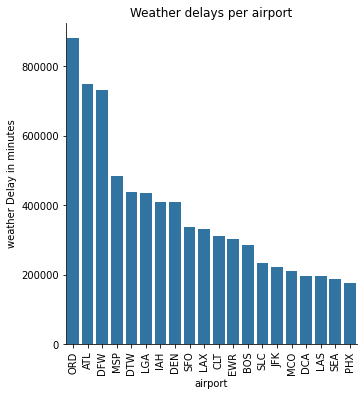

In [112]:
#grouping 
airport_delays = df[['airport','weather_delay']].groupby('airport').sum().reset_index().sort_values('weather_delay',ascending=False)

#chosing top affective part 
airport_delays = airport_delays.iloc[:20]

airport_delays = pd.melt(airport_delays, id_vars='airport', value_vars=['weather_delay'])


color = sn.color_palette()[0]
sn.factorplot(x='airport', y='value', data=airport_delays, kind='bar' , color = color)
plt.xticks(rotation=90)
plt.ylabel('weather Delay in minutes')
plt.title('Weather delays per airport')
plt.show()

>we can see that ORD(Chicago, IL: Chicago O'Hare International) and ATL (Atlanta, GA: Hartsfield-Jackson Atlanta Intern)is the biggest to have affect of bad weather , it may not be related of bad dealing with bad weather and may be this high delay time due to bad weather of country , but on my point of view it's not recommended to go to this airports .

# Multi-variate exploration 

here we would explore more about relatioship between carrier and airport and number of cancellation , and make compare between 3 airport with 14 different carrier and try to find airport with most cancellation rate with different tech . 

I would explain why i take sample in nexty few lines . 

In [113]:
df_cancel = df[['carrier', 'airport','arr_cancelled']].groupby(['airport','carrier']).sum().reset_index()


when i tried to make a graph for total data that appeared to take a lot of time so i raked a sample of data , we could consider that compare between different types of airport 

In [114]:
df_cancel_s = df_cancel.loc[0:20]

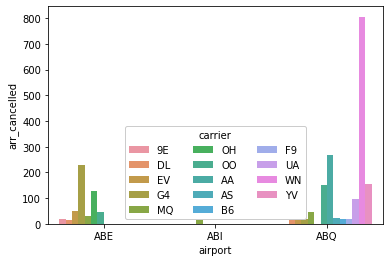

In [115]:

ax = sn.barplot(data = df_cancel_s, x = 'airport', y = 'arr_cancelled', hue = 'carrier')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'carrier') ; 

* we can see from this graph that ABQ with WN have the most cancellation flights 

### Trying in same example using heatmap 

In [116]:
cat_means = df.groupby(['airport','carrier']).mean()['arr_cancelled']


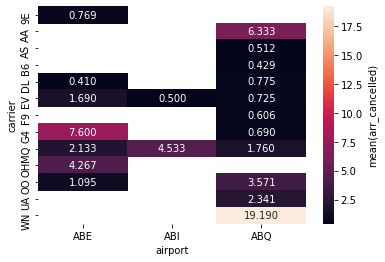

In [117]:
cat_means = df.groupby(['airport','carrier']).mean()['arr_cancelled']
cat_means = cat_means.head(20)
cat_means = cat_means.reset_index(name = 'arr_cancelled_avg')
cat_means = cat_means.pivot(index = 'carrier', columns = 'airport',
                            values = 'arr_cancelled_avg')
sn.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(arr_cancelled)'}) ;



it may still not clear   but we can see big value of 19 for ABQ let's try to find more good way

### Trying with different axies 

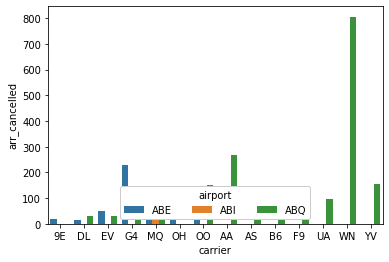

In [118]:

ax = sn.barplot(data = df_cancel_s, x = 'carrier', y = 'arr_cancelled', hue = 'airport')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'airport') ; 

this may appear more clear than previous all what we did here is changing x with hue that could give us good insight that also ABQ (Albuquerque, NM: Albuquerque International) airport have the most cancellation rate . 
